<a href="https://colab.research.google.com/github/MTSAHU/MNIST-Neural-Networks-DL/blob/main/Copy_of_AmitSahu_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input

In [ ]:
df = pd.read_csv('Electricity_Theft_Data.csv')

In [ ]:
df.head()

,CONS_NO,01-01-15,02-01-15,03-01-15,04-01-15,05-01-15,06-01-15,07-01-15,08-01-15,09-01-15,...,23-12-15,24-12-15,25-12-15,26-12-15,27-12-15,28-12-15,29-12-15,30-12-15,31-12-15,CHK_STATE
0,NaN,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,357.00,358.00,359.00,360.00,361.00,362.00,363.00,364.00,365.00,NaN
1,8.546920e+09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
2,6.177183e+08,1.12,1.73,3.34,2.77,3.50,2.86,1.25,1.12,1.51,...,17.31,15.95,17.00,32.05,28.72,31.11,28.47,16.70,14.96,1.0
3,7.222500e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
4,7.134080e+09,1.58,3.65,2.54,4.28,1.62,1.39,2.33,1.78,1.80,...,4.17,7.95,8.84,2.20,2.91,10.52,7.98,3.68,1.41,1.0


In [ ]:
df.dropna(axis=1, thresh=0.8 * len(df), inplace=True) # Drop columns with >20% missing
df.fillna(0, inplace=True) # Fill remaining missing values

In [ ]:
X = df.drop(columns=['CHK_STATE'])
y = df['CHK_STATE']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1)) # Reshape for RNN

In [ ]:
# First split into train (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42, stratify=y
)

# Then split temp into val (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [ ]:
print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (5974, 335, 1)
Validation shape: (1991, 335, 1)
Test shape: (1992, 335, 1)


In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # Explicit input layer
    SimpleRNN(128, activation='relu', return_sequences=True),
    SimpleRNN(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 335, 128)       │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,057 (113.50 KB)

 Trainable params: 29,057 (113.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.8609 - loss: 0.4308 - val_accuracy: 0.8599 - val_loss: 0.4056
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8591 - loss: 0.4136 - val_accuracy: 0.8599 - val_loss: 0.4058
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8652 - loss: 0.4008 - val_accuracy: 0.8599 - val_loss: 0.4069
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8622 - loss: 0.4115 - val_accuracy: 0.8599 - val_loss: 0.4061
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8596 - loss: 0.4117 - val_accuracy: 0.8599 - val_loss: 0.4077
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8638 - loss: 36.2725 - val_accuracy: 0.8599 - val_loss: 0.4062


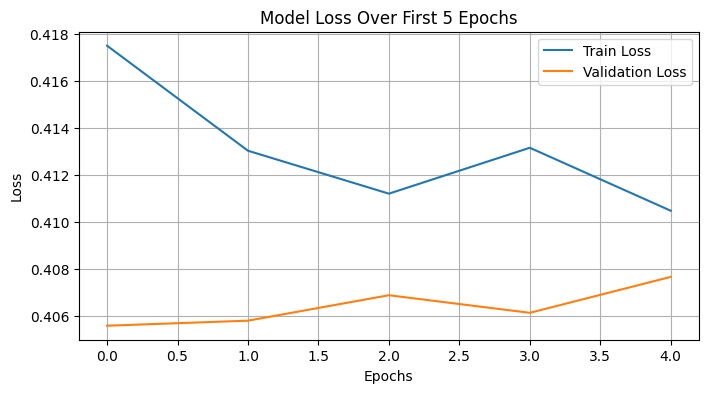

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'][:5], label='Train Loss')
plt.plot(history.history['val_loss'][:5], label='Validation Loss')
plt.title('Model Loss Over First 5 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


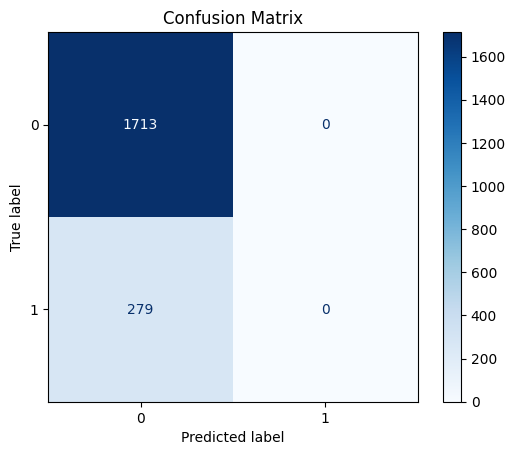

In [ ]:
# --- Step 6: Evaluate on Test Set ---
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.4).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(df['CHK_STATE'].value_counts())

CHK_STATE
0.0    8563
1.0    1394
Name: count, dtype: int64


In [ ]:
# Final Test Accurancy
test_acc = accuracy_score(y_test, y_pred)
print(f"\n Final Test Accuracy: {test_acc:.4f}")


 Final Test Accuracy: 0.8599
